In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

(1080, 1920)


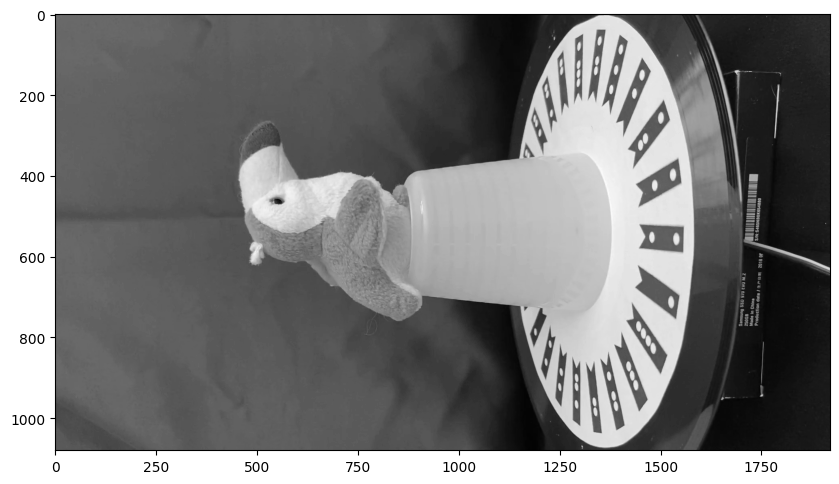

In [2]:
img = cv.imread("./assignment1_test_dataset/obj01/000000.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

print(gray.shape)
plt.figure( figsize=(10,10) )
plt.imshow(gray, cmap="gray")

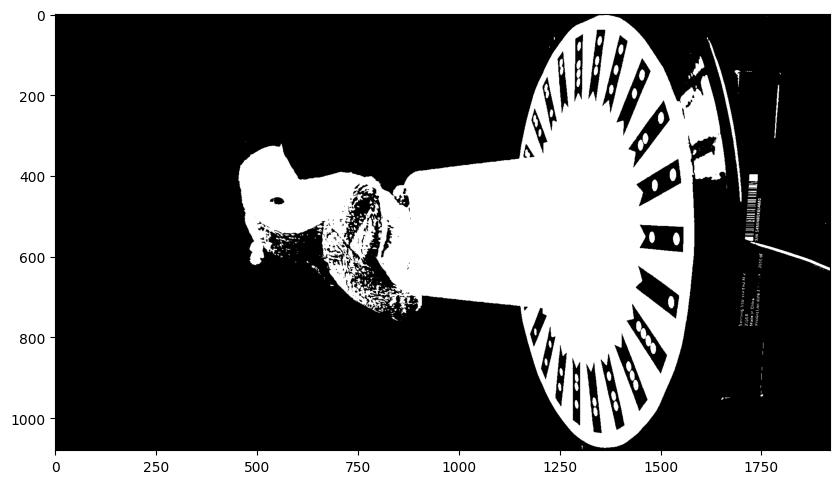

In [3]:
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.figure( figsize=(10,10) )
plt.imshow(thresh, cmap="gray")

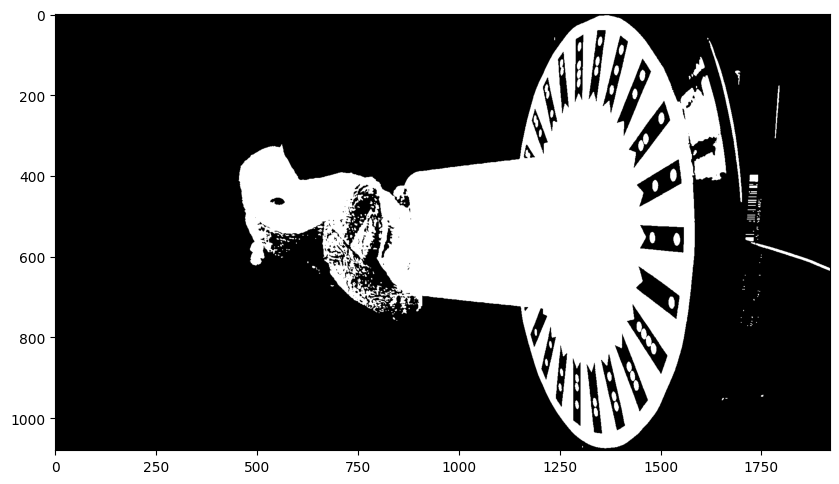

In [4]:
# Our kernel
#se = cv.getStructuringElement(cv.MORPH_ELLIPSE,(2,2))
se = np.ones((2,2),np.uint8)
opened = cv.morphologyEx(thresh, cv.MORPH_OPEN, se) # Erosion followed by Dialtation = Opening

plt.figure( figsize=(10,10))
plt.imshow( opened, cmap="gray")

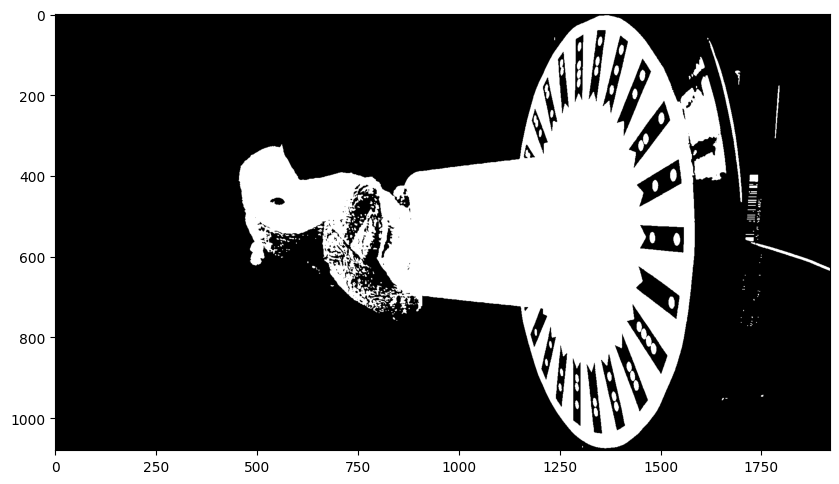

In [5]:
# sure background area
sure_bg = cv.dilate(opened, se, iterations=3)
plt.figure( figsize=(10,10))
plt.imshow( opened, cmap="gray")

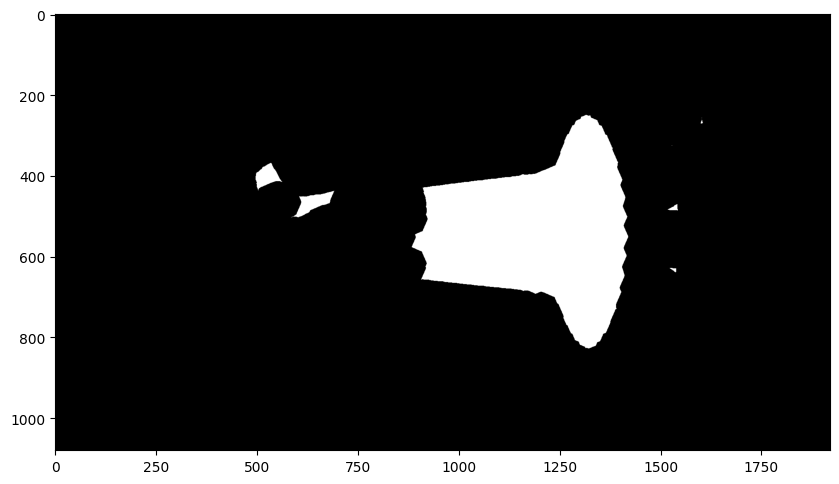

In [6]:

# Finding sure foreground area
dist_transform = cv.distanceTransform(opened, cv.DIST_L2, 3)
ret, sure_fg = cv.threshold(dist_transform, 0.2*dist_transform.max(), 255, 0)
 
plt.figure( figsize=(10,10))
plt.imshow( sure_fg, cmap="gray")

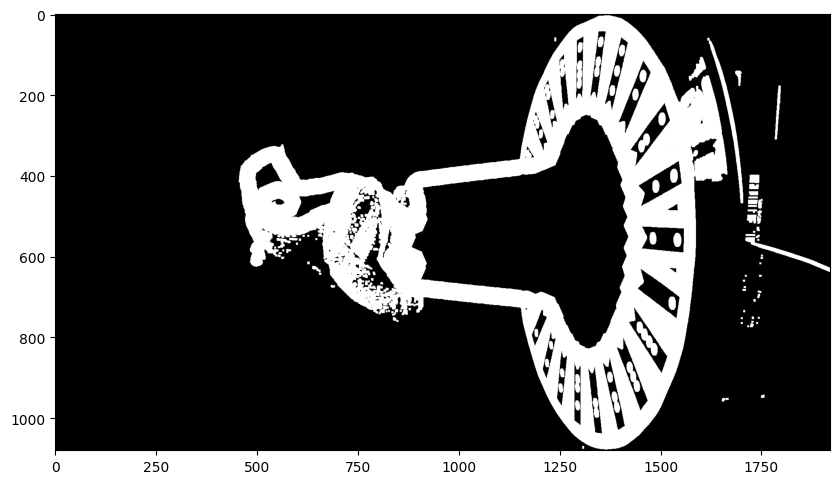

In [7]:

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)

plt.figure( figsize=(10,10))
plt.imshow( unknown, cmap="gray")

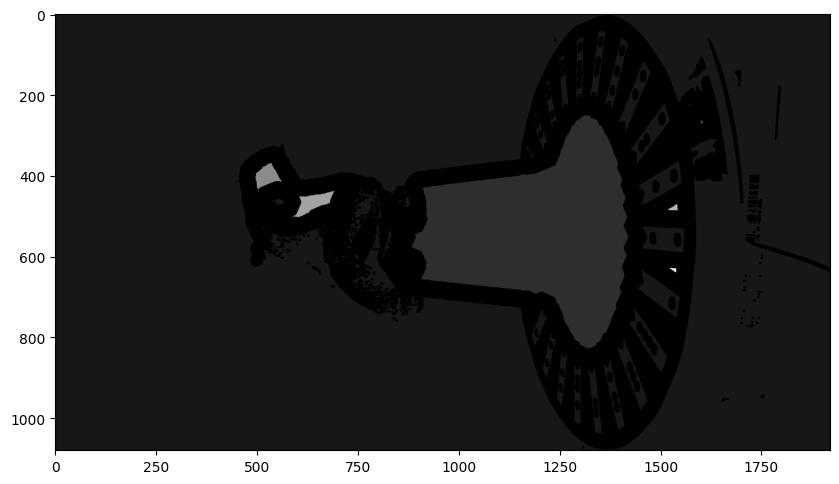

In [8]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.figure( figsize=(10,10))
plt.imshow( markers, cmap="gray")

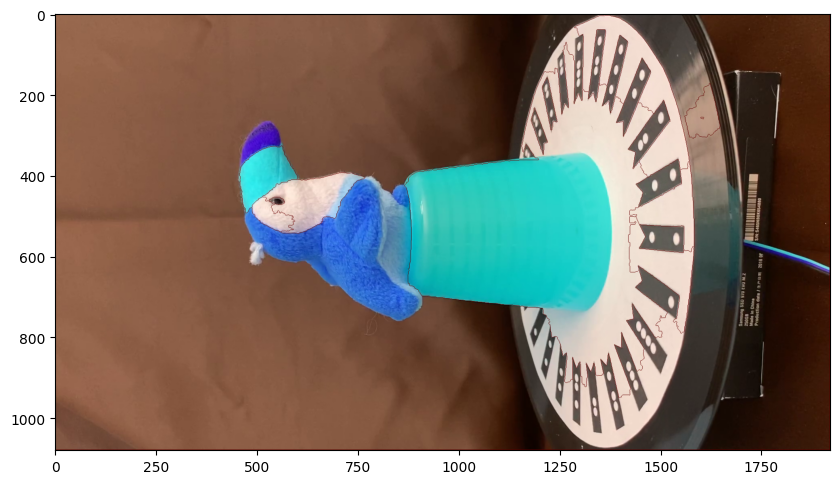

In [15]:
markers = cv.watershed(img, markers)
img[markers == -1] = [0,0,0]

plt.figure( figsize=(10,10))
plt.imshow( img, cmap="gray")

# Video Procedure

In [10]:
'''# Wanted video to process
object = 'obj01'

# Read the input video
input_video = cv.VideoCapture(f'./data/{object}.mp4')

# Get video properties
frame_width = int(input_video.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(input_video.get(cv.CAP_PROP_FRAME_HEIGHT))
fps = input_video.get(cv.CAP_PROP_FPS)

# Create output video writer
output_video = cv.VideoWriter(f'./output/{object}_mask.mp4', cv.VideoWriter_fourcc(*'MP4V'), fps, (frame_width, frame_height))'''

"# Wanted video to process\nobject = 'obj01'\n\n# Read the input video\ninput_video = cv.VideoCapture(f'./data/{object}.mp4')\n\n# Get video properties\nframe_width = int(input_video.get(cv.CAP_PROP_FRAME_WIDTH))\nframe_height = int(input_video.get(cv.CAP_PROP_FRAME_HEIGHT))\nfps = input_video.get(cv.CAP_PROP_FPS)\n\n# Create output video writer\noutput_video = cv.VideoWriter(f'./output/{object}_mask.mp4', cv.VideoWriter_fourcc(*'MP4V'), fps, (frame_width, frame_height))"

In [11]:
'''# Iterate through each frame of the input video
while True:
    ret, frame = input_video.read()

    if not ret: break

    # Apply seed-based watershed algorithm
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)


    _, markers = cv.connectedComponents(thresh)
    markers = markers + 1
    markers[markers == 255] = 0
    markers = cv.watershed(frame, markers)

    # Convert markers to colored overlay
    overlay = np.zeros(frame.shape, dtype=np.uint8)
    overlay[markers == -1] = (0, 0, 255)  # Red color for boundaries

    # Apply the overlay on the frame
    result = cv.addWeighted(frame, 1, overlay, 0.5, 0)

    # Write the transformed frame to the output video
    output_video.write(result)

# Release video objects
input_video.release()
output_video.release()
'''

'# Iterate through each frame of the input video\nwhile True:\n    ret, frame = input_video.read()\n\n    if not ret: break\n\n    # Apply seed-based watershed algorithm\n    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)\n    ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)\n\n\n    _, markers = cv.connectedComponents(thresh)\n    markers = markers + 1\n    markers[markers == 255] = 0\n    markers = cv.watershed(frame, markers)\n\n    # Convert markers to colored overlay\n    overlay = np.zeros(frame.shape, dtype=np.uint8)\n    overlay[markers == -1] = (0, 0, 255)  # Red color for boundaries\n\n    # Apply the overlay on the frame\n    result = cv.addWeighted(frame, 1, overlay, 0.5, 0)\n\n    # Write the transformed frame to the output video\n    output_video.write(result)\n\n# Release video objects\ninput_video.release()\noutput_video.release()\n'